# Trabajo académico final : Genera una aplicación de inteligencia artificial que use librerías de software libre a través de herramientas colaborativas
## Estudiante:
* Jhordan Kriss Bustamante Solano



In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import pandas as pd

import numpy as np

import os

os.chdir('..')



%matplotlib inline

import seaborn as sns

import matplotlib.pyplot as plt

import copy

data = pd.read_csv('/content/gym_members_exercise_tracking.csv', delimiter=',', encoding='unicode_escape')

In [28]:
data

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [29]:
data.shape

(973, 15)

In [30]:
data.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [31]:
def remove_outliers(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [32]:
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()

In [33]:
data = remove_outliers(data, numeric_columns)

In [34]:
data

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [35]:
# Este es tu preprocesamiento actual
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
data = remove_outliers(data, numeric_columns)


In [36]:
import sqlite3

conn = sqlite3.connect("gimnasio.db")
cursor = conn.cursor()

# Crear tabla ejercicios y poblarla
cursor.executescript("""
DROP TABLE IF EXISTS ejercicios;

CREATE TABLE ejercicios (
    id INTEGER PRIMARY KEY,
    nombre TEXT,
    calorias_quemadas INTEGER
);

INSERT INTO ejercicios (nombre, calorias_quemadas) VALUES
('Yoga', 180),
('Trote', 450),
('Ciclismo', 300),
('Pesas', 250);
""")

conn.commit()
conn.close()


In [37]:
# Volver a abrir la conexión y leer con pandas
conn = sqlite3.connect("gimnasio.db")
df_sql = pd.read_sql("SELECT * FROM ejercicios", conn)
df_sql


,id,nombre,calorias_quemadas
0,1,Yoga,180
1,2,Trote,450
2,3,Ciclismo,300
3,4,Pesas,250


In [38]:
q1 = data['Calories_Burned'].quantile(0.33)
q2 = data['Calories_Burned'].quantile(0.66)

def classify_calories(x):
    if x < q1:
        return 'Low'
    elif x <= q2:
        return 'Medium'
    else:
        return 'High'

data['Calories_Category'] = data['Calories_Burned'].apply(classify_calories)
data

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Calories_Category
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,High
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,Medium
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,Low
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,Low
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,20,Male,55.0,1.60,172,168,67,1.12,1035.0,Yoga,24.0,3.2,4,2,21.48,High
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77,High
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69,High
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50,Medium


In [39]:
data.shape

(912, 16)

In [40]:
print(data.columns)

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Calories_Category'],
      dtype='object')


In [41]:
features = data.drop(columns=['Calories_Category', 'Calories_Burned'])
target = data['Calories_Category']

In [42]:
print(features.shape)
print(target.shape)

(912, 14)
(912,)


In [43]:
target.unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [44]:
varCategory = pd.get_dummies(features, drop_first=True)

In [45]:
# Mapeo entre Workout_Type y nombre del ejercicio en SQL
mapeo = {
    "Yoga": "Yoga",
    "HIIT": "Trote",
    "Cardio": "Ciclismo",
    "Strength": "Pesas"
}

data["Ejercicio_SQL"] = data["Workout_Type"].map(mapeo)

conn = sqlite3.connect("gimnasio.db")
df_sql = pd.read_sql("SELECT * FROM ejercicios", conn)

data = data.merge(df_sql, how="left", left_on="Ejercicio_SQL", right_on="nombre")

conn.close()

data[["Workout_Type", "Ejercicio_SQL", "Calories_Burned", "calorias_quemadas"]].head()


,Workout_Type,Ejercicio_SQL,Calories_Burned,calorias_quemadas
0,Yoga,Yoga,1313.0,180
1,HIIT,Trote,883.0,450
2,Cardio,Ciclismo,677.0,300
3,Strength,Pesas,532.0,250
4,Strength,Pesas,556.0,250


## Estandarización de datos

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_Norm = scaler.fit_transform(varCategory)

In [47]:
data_Norm = pd.DataFrame(data_Norm, columns=varCategory.columns)
data_Norm.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Male,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
count,9.120000e+02,9.120000e+02,9.120000e+02,9.120000e+02,9.120000e+02,9.120000e+02,9.120000e+02,9.120000e+02,9.120000e+02,9.120000e+02,9.120000e+02,9.120000e+02,9.120000e+02,9.120000e+02,9.120000e+02,9.120000e+02
mean,2.298356e-16,-7.498875e-17,6.505517e-16,1.079059e-15,-9.544022e-16,-4.104904e-16,3.700743e-17,2.308095e-16,-2.337312e-16,-2.356789e-16,-1.304999e-16,1.830894e-16,-3.505967e-17,-7.791039e-18,-3.116416e-17,1.071268e-16
std,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00,1.000549e+00
min,-1.715039e+00,-1.694251e+00,-1.727087e+00,-1.722534e+00,-1.636217e+00,-1.644317e+00,-2.221509e+00,-2.411576e+00,-1.835166e+00,-1.440027e+00,-1.087689e+00,-2.109312e+00,-9.890945e-01,-5.384771e-01,-5.925463e-01,-5.790384e-01
25%,-8.871583e-01,-7.278590e-01,-7.918914e-01,-8.530681e-01,-8.653647e-01,-8.293078e-01,-6.137693e-01,-6.106661e-01,-8.393280e-01,-3.492423e-01,-1.087689e+00,-7.642978e-01,-9.890945e-01,-5.384771e-01,-5.925463e-01,-5.790384e-01
50%,1.062992e-01,-1.545757e-01,-9.049455e-02,1.639782e-02,-9.451239e-02,-1.429841e-02,3.960425e-02,2.021340e-01,-9.463369e-03,-3.492423e-01,2.582709e-01,-3.435374e-02,-9.890945e-01,-5.384771e-01,-5.925463e-01,-5.790384e-01
75%,8.513923e-01,6.261814e-01,6.109023e-01,8.858637e-01,8.865723e-01,8.007110e-01,5.975412e-01,6.961890e-01,8.204013e-01,7.415419e-01,2.582709e-01,6.716206e-01,1.011026e+00,-5.384771e-01,1.687632e+00,1.727001e+00
max,1.679274e+00,2.799198e+00,2.169562e+00,1.668383e+00,1.797580e+00,1.615720e+00,2.153892e+00,1.572738e+00,1.816239e+00,1.832326e+00,1.604231e+00,2.771453e+00,1.011026e+00,1.857089e+00,1.687632e+00,1.727001e+00


In [48]:
data_Norm.columns

Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Gender_Male', 'Workout_Type_HIIT', 'Workout_Type_Strength',
       'Workout_Type_Yoga'],
      dtype='object')

In [49]:
data_Norm.columns

Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Gender_Male', 'Workout_Type_HIIT', 'Workout_Type_Strength',
       'Workout_Type_Yoga'],
      dtype='object')

In [50]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled = train_test_split(data_Norm, target, test_size=0.2, random_state=42)

In [51]:
X_train_scaled.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Male,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
count,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000
mean,0.037366,0.001977,-0.017586,0.016875,-0.039815,-0.006659,0.004116,-0.018583,0.031290,0.003879,0.005326,0.014507,0.020568,-0.025846,0.004867,0.006170
std,0.989201,0.999182,0.981729,1.006975,0.997663,1.009975,0.996509,0.996957,0.988880,1.012778,1.009167,1.012837,1.000701,0.983147,1.003338,1.004206
min,-1.715039,-1.694251,-1.727087,-1.722534,-1.636217,-1.644317,-2.221509,-2.411576,-1.835166,-1.440027,-1.087689,-2.109312,-0.989095,-0.538477,-0.592546,-0.579038
25%,-0.804370,-0.749698,-0.791891,-0.853068,-0.865365,-0.965143,-0.606428,-0.610666,-0.673355,-0.349242,-1.087689,-0.745303,-0.989095,-0.538477,-0.592546,-0.579038
50%,0.106299,-0.149116,-0.090495,0.016398,-0.164590,-0.014298,0.039604,0.202134,-0.009463,-0.349242,0.258271,-0.025309,1.011026,-0.538477,-0.592546,-0.579038
75%,0.934180,0.664400,0.532969,0.885864,0.816495,0.800711,0.597541,0.680252,0.820401,0.741542,0.258271,0.674786,1.011026,-0.538477,1.687632,1.727001
max,1.679274,2.799198,2.169562,1.668383,1.797580,1.615720,2.153892,1.572738,1.816239,1.832326,1.604231,2.771453,1.011026,1.857089,1.687632,1.727001


In [52]:
val_1 = Y_train_scaled.value_counts()
print(val_1)

Calories_Category
Medium    244
High      243
Low       242
Name: count, dtype: int64


In [53]:
Y_test_scaled.head()

,Calories_Category
690,Medium
809,Medium
579,High
390,Medium
384,High


In [54]:
val_2 = Y_test_scaled.value_counts()
print(val_2)

Calories_Category
High      67
Low       59
Medium    57
Name: count, dtype: int64


In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(varCategory, target, test_size=0.2, random_state=42)

In [56]:
X_train.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000
mean,39.167353,71.067353,1.719355,180.005487,142.780521,62.056241,1.257915,25.015089,2.624554,3.323731,1.812071,24.060096
std,11.948584,18.300574,0.125971,11.581530,14.236565,7.435316,0.339351,6.255509,0.595808,0.928486,0.749774,5.598781
min,18.000000,40.000000,1.500000,160.000000,120.000000,50.000000,0.500000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,29.000000,57.300000,1.620000,170.000000,131.000000,55.000000,1.050000,21.300000,2.200000,3.000000,1.000000,19.860000
50%,40.000000,68.300000,1.710000,180.000000,141.000000,62.000000,1.270000,26.400000,2.600000,3.000000,2.000000,23.840000
75%,50.000000,83.200000,1.790000,190.000000,155.000000,68.000000,1.460000,29.400000,3.100000,4.000000,2.000000,27.710000
max,59.000000,122.300000,2.000000,199.000000,169.000000,74.000000,1.990000,35.000000,3.700000,5.000000,3.000000,39.300000


In [57]:
val_3 = Y_train.value_counts()
print(val_3)

Calories_Category
Medium    244
High      243
Low       242
Name: count, dtype: int64


In [58]:
Y_test.head()

,Calories_Category
690,Medium
809,Medium
579,High
390,Medium
384,High


In [59]:
val_4 = Y_test.value_counts()
print(val_4)

Calories_Category
High      67
Low       59
Medium    57
Name: count, dtype: int64


## Balanceo de la data

In [60]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [61]:
Counter(Y_train)

Counter({'Medium': 244, 'Low': 242, 'High': 243})

In [62]:
print(Y_train.value_counts())


Calories_Category
Medium    244
High      243
Low       242
Name: count, dtype: int64


In [63]:
over_smote = SMOTE(k_neighbors=5, random_state=42)
X_trainB, Y_trainB = over_smote.fit_resample(X_train, Y_train)

In [64]:
Counter(Y_trainB)

Counter({'Medium': 244, 'Low': 244, 'High': 244})

In [65]:
Counter(Y_train_scaled)

Counter({'Medium': 244, 'Low': 242, 'High': 243})

In [66]:
over_smote = SMOTE(k_neighbors=5, random_state=42)
X_train_Norm, Y_train_Norm = over_smote.fit_resample(X_train_scaled, Y_train_scaled)

In [67]:
Counter(Y_train_Norm)

Counter({'Medium': 244, 'Low': 244, 'High': 244})

In [68]:
target.value_counts()

,count
Calories_Category,
High,310
Medium,301
Low,301


## Agoritmos

### Random Forest

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [70]:
param_grid = {'n_estimators': [5, 10, 20],
              'criterion':['gini', 'entropy'],
              'max_depth': [5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

rf = RandomForestClassifier(random_state=46)
rf_model = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
rf_model.fit(X_trainB, Y_trainB)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
810 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
810 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=46),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 10, 20]})

In [71]:
print(rf_model.best_params_)
print(rf_model.best_estimator_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 20}
RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       n_estimators=20, random_state=46)


In [72]:
model_RF = rf_model.best_estimator_
pred_Y = model_RF.predict(X_test)
conf_matrix_RF = confusion_matrix(Y_test, pred_Y)
classification_rep_RF = classification_report(Y_test, pred_Y)

In [73]:
print("Matriz de Confusión:\n",conf_matrix_RF)
print("Informe de Clasificiación:\n",classification_rep_RF)

Matriz de Confusión:
 [[59  0  8]
 [ 0 51  8]
 [ 2  7 48]]
Informe de Clasificiación:
               precision    recall  f1-score   support

        High       0.97      0.88      0.92        67
         Low       0.88      0.86      0.87        59
      Medium       0.75      0.84      0.79        57

    accuracy                           0.86       183
   macro avg       0.87      0.86      0.86       183
weighted avg       0.87      0.86      0.87       183



In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


dt_model = DecisionTreeClassifier(random_state=42)


grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


grid_search.fit(X_trainB, Y_trainB)


best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Mejores parámetros encontrados:", best_params)


pred_Y_dt_best = best_model.predict(X_test)


conf_matrix_dt_best = confusion_matrix(Y_test, pred_Y_dt_best)
classification_rep_dt_best = classification_report(Y_test, pred_Y_dt_best)
accuracy_dt_best = accuracy_score(Y_test, pred_Y_dt_best)

# Imprimimos los resultados
print("Matriz de Confusión para Árbol de Decisión (Mejor Modelo):\n", conf_matrix_dt_best)
print("Informe de Clasificación para Árbol de Decisión (Mejor Modelo):\n", classification_rep_dt_best)
print("Precisión del modelo Árbol de Decisión (Mejor Modelo):", accuracy_dt_best)


Mejores parámetros encontrados: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Matriz de Confusión para Árbol de Decisión (Mejor Modelo):
 [[65  0  2]
 [ 0 51  8]
 [ 5  3 49]]
Informe de Clasificación para Árbol de Decisión (Mejor Modelo):
               precision    recall  f1-score   support

        High       0.93      0.97      0.95        67
         Low       0.94      0.86      0.90        59
      Medium       0.83      0.86      0.84        57

    accuracy                           0.90       183
   macro avg       0.90      0.90      0.90       183
weighted avg       0.90      0.90      0.90       183

Precisión del modelo Árbol de Decisión (Mejor Modelo): 0.9016393442622951


In [75]:
from sklearn.naive_bayes import GaussianNB
nb_param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7]}

nb = GaussianNB()
nb_model = GridSearchCV(estimator=nb, param_grid=nb_param_grid, cv=5)
nb_model.fit(X_train_Norm, Y_train_Norm)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07]})

In [76]:
print(nb_model.best_params_)
print(nb_model.best_estimator_)

{'var_smoothing': 1e-09}
GaussianNB()


In [77]:
model_NB = nb_model.best_estimator_
pred_Y = model_NB.predict(X_test_scaled)
conf_matrix_NB = confusion_matrix(Y_test_scaled, pred_Y)
classification_rep_NB = classification_report(Y_test_scaled, pred_Y)

In [78]:
print("Matriz de Confusión:\n",conf_matrix_NB)
print("Informe de Clasificiación:\n",classification_rep_NB)

Matriz de Confusión:
 [[36  0 31]
 [ 0 48 11]
 [ 0  5 52]]
Informe de Clasificiación:
               precision    recall  f1-score   support

        High       1.00      0.54      0.70        67
         Low       0.91      0.81      0.86        59
      Medium       0.55      0.91      0.69        57

    accuracy                           0.74       183
   macro avg       0.82      0.75      0.75       183
weighted avg       0.83      0.74      0.75       183



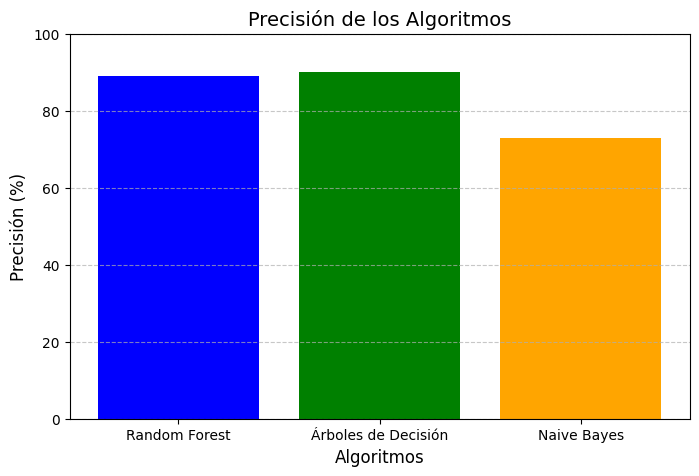

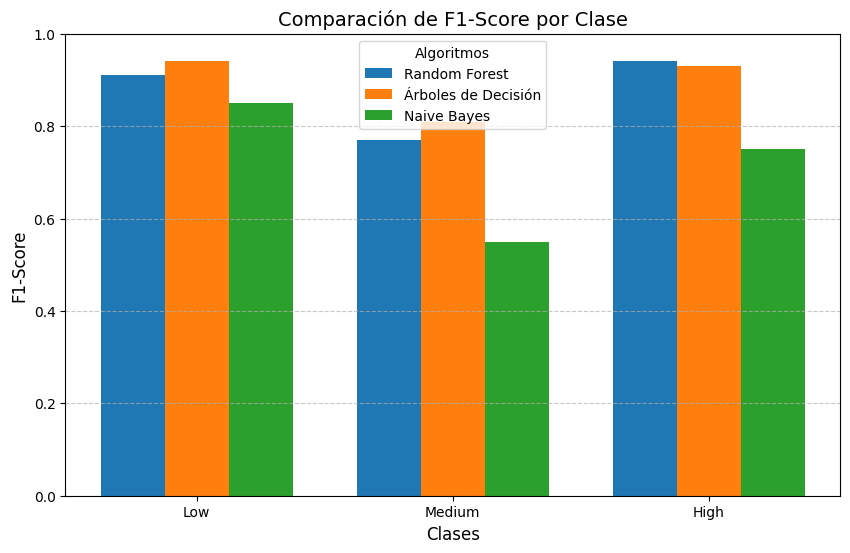

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Datos basados en los resultados del notebook
algorithms = ["Random Forest", "Árboles de Decisión", "Naive Bayes"]
accuracy = [89, 90, 73]  # Precisión extraída de los informes de clasificación
f1_scores = {
    "Low": [0.91, 0.94, 0.85],    # F1-scores por clase
    "Medium": [0.77, 0.81, 0.55],
    "High": [0.94, 0.93, 0.75],
}

# Gráfico de precisión
plt.figure(figsize=(8, 5))
plt.bar(algorithms, accuracy, color=["blue", "green", "orange"])
plt.title("Precisión de los Algoritmos", fontsize=14)
plt.ylabel("Precisión (%)", fontsize=12)
plt.xlabel("Algoritmos", fontsize=12)
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Gráfico de F1-score por clase
classes = list(f1_scores.keys())
x = np.arange(len(classes))
width = 0.25

plt.figure(figsize=(10, 6))
for i, algo in enumerate(algorithms):
    plt.bar(
        x + i * width,
        [f1_scores[cls][i] for cls in classes],
        width,
        label=algo,
    )

plt.title("Comparación de F1-Score por Clase", fontsize=14)
plt.xlabel("Clases", fontsize=12)
plt.ylabel("F1-Score", fontsize=12)
plt.xticks(x + width, classes)
plt.legend(title="Algoritmos")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


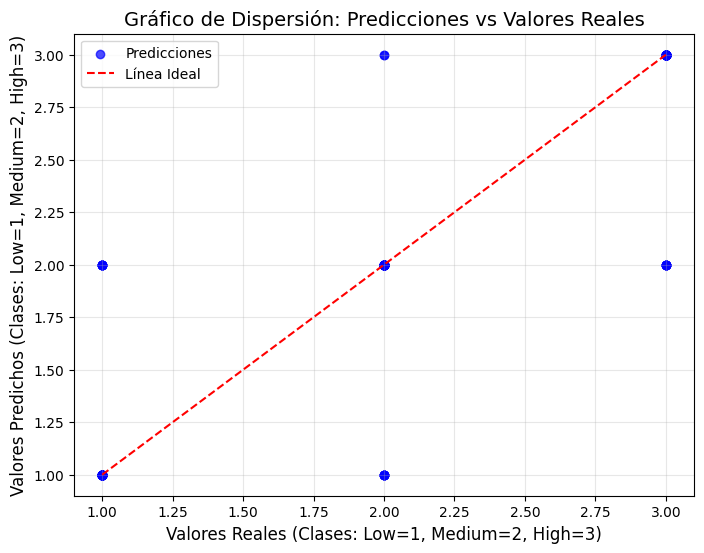

In [80]:
# Generar predicciones del modelo Random Forest en los datos de prueba
predicted_values = model_RF.predict(X_test)

# Convertir valores reales y predichos a números para graficar
actual_values = Y_test.map({"Low": 1, "Medium": 2, "High": 3})  # Mapear las clases a valores numéricos
predicted_numeric = pd.Series(predicted_values).map({"Low": 1, "Medium": 2, "High": 3})

# Crear gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(actual_values, predicted_numeric, color="blue", alpha=0.7, label="Predicciones")
plt.plot([1, 3], [1, 3], color="red", linestyle="--", label="Línea Ideal")  # Línea ideal de predicción perfecta

# Añadir etiquetas y título
plt.title("Gráfico de Dispersión: Predicciones vs Valores Reales", fontsize=14)
plt.xlabel("Valores Reales (Clases: Low=1, Medium=2, High=3)", fontsize=12)
plt.ylabel("Valores Predichos (Clases: Low=1, Medium=2, High=3)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [81]:
predicted_rf = model_RF.predict(X_test)
predicted_dt = best_model.predict(X_test)
predicted_nb = model_NB.predict(X_test_scaled)


In [82]:
actual_numeric = Y_test.map({"Low": 1, "Medium": 2, "High": 3})
predicted_rf_numeric = pd.Series(predicted_rf).map({"Low": 1, "Medium": 2, "High": 3})
predicted_dt_numeric = pd.Series(predicted_dt).map({"Low": 1, "Medium": 2, "High": 3})
predicted_nb_numeric = pd.Series(predicted_nb).map({"Low": 1, "Medium": 2, "High": 3})


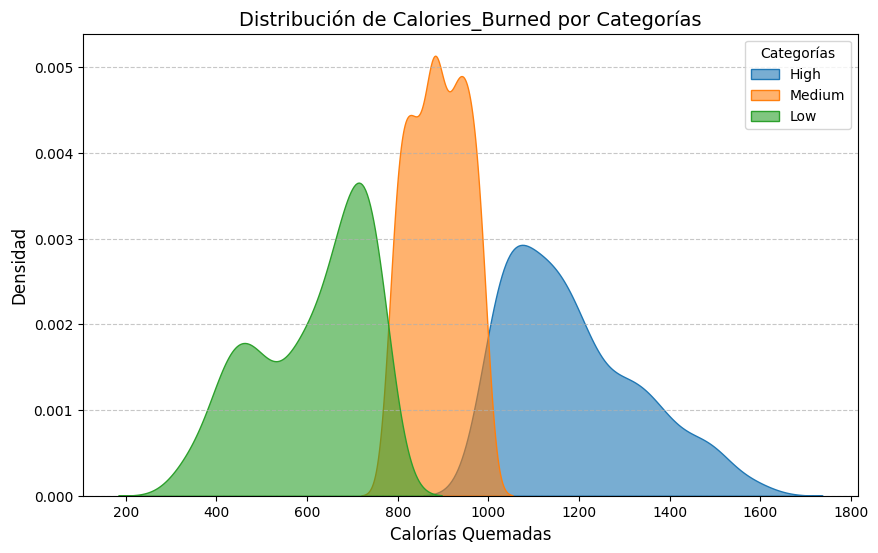

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un diagrama de distribución segmentado por 'Calories_Category'
plt.figure(figsize=(10, 6))
for category in data['Calories_Category'].unique():
    subset = data[data['Calories_Category'] == category]
    sns.kdeplot(subset['Calories_Burned'], label=category, fill=True, alpha=0.6)

# Añadir títulos y etiquetas
plt.title("Distribución de Calories_Burned por Categorías", fontsize=14)
plt.xlabel("Calorías Quemadas", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Categorías")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


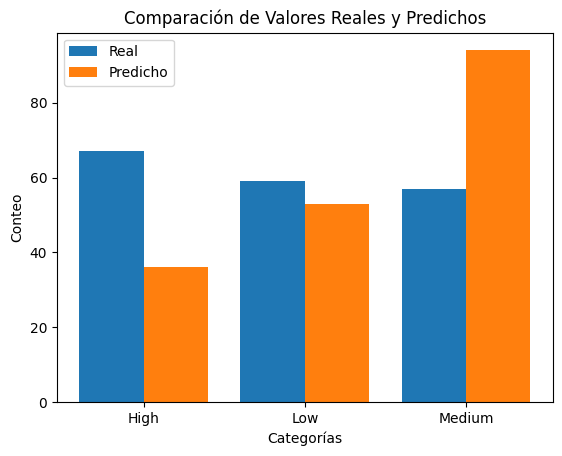

In [84]:
# Crear DataFrame para comparar predicciones y valores reales
comparison_df = pd.DataFrame({'Real': Y_test, 'Predicho': pred_Y})

# Contar ocurrencias de cada categoría
real_counts = comparison_df['Real'].value_counts().sort_index()
predicted_counts = comparison_df['Predicho'].value_counts().sort_index()

# Graficar
bar_width = 0.4
categories = real_counts.index
x = np.arange(len(categories))

plt.bar(x - bar_width / 2, real_counts, bar_width, label='Real')
plt.bar(x + bar_width / 2, predicted_counts, bar_width, label='Predicho')

plt.xlabel('Categorías')
plt.ylabel('Conteo')
plt.title('Comparación de Valores Reales y Predichos')
plt.xticks(x, categories)
plt.legend()
plt.show()


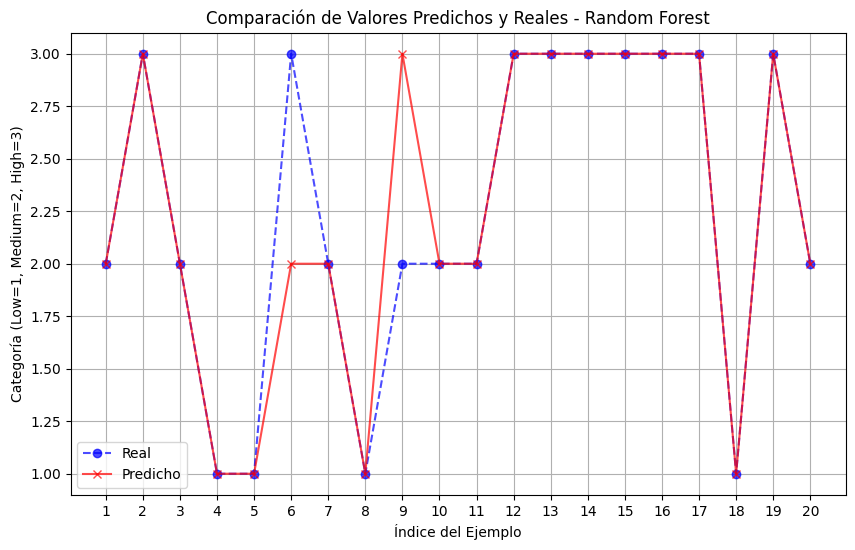

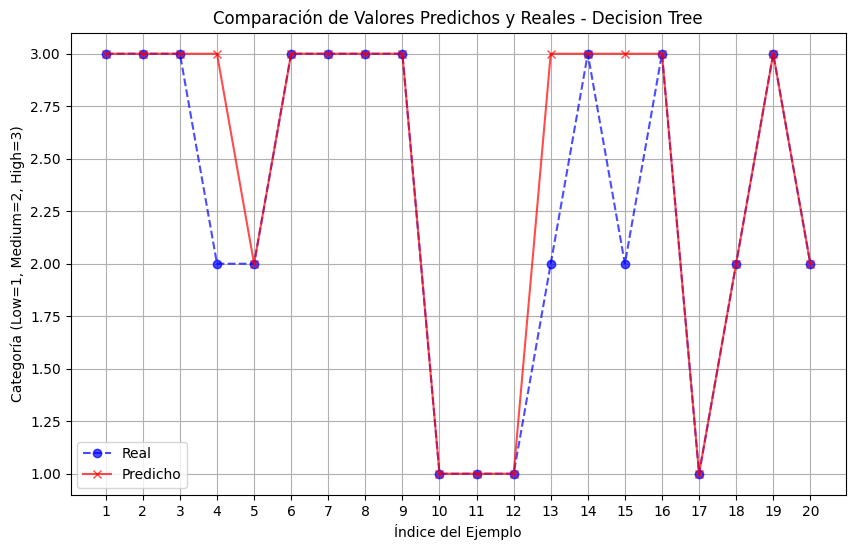

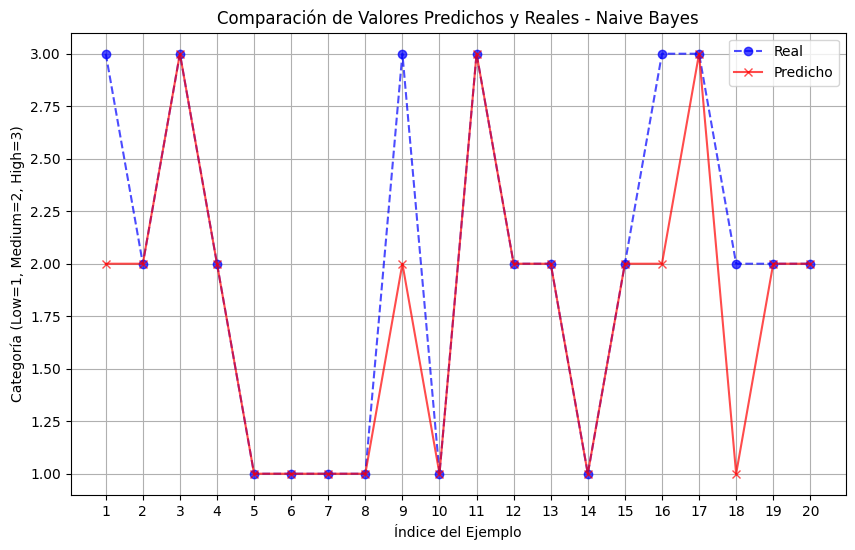

In [85]:
# Crear una función para graficar valores reales y predichos
def plot_comparison(y_test, pred_y, algorithm_name, random_samples=20):
    import random

    # Seleccionar índices aleatorios
    random_indices = random.sample(range(len(y_test)), random_samples)

    # Crear DataFrame con valores predichos y reales
    comparison_df = pd.DataFrame({
        'Real': y_test.iloc[random_indices].values,
        'Predicho': pred_y[random_indices]
    })

    # Mapeamos las categorías a números para graficar
    category_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
    comparison_df['Real_Num'] = comparison_df['Real'].map(category_mapping)
    comparison_df['Predicho_Num'] = comparison_df['Predicho'].map(category_mapping)

    # Graficar
    plt.figure(figsize=(10, 6))
    x = range(len(comparison_df))
    plt.plot(x, comparison_df['Real_Num'], marker='o', label='Real', linestyle='--', color='blue', alpha=0.7)
    plt.plot(x, comparison_df['Predicho_Num'], marker='x', label='Predicho', linestyle='-', color='red', alpha=0.7)

    # Configurar gráfico
    plt.xticks(x, labels=range(1, len(x) + 1))
    plt.xlabel('Índice del Ejemplo')
    plt.ylabel('Categoría (Low=1, Medium=2, High=3)')
    plt.title(f'Comparación de Valores Predichos y Reales - {algorithm_name}')
    plt.legend()
    plt.grid()
    plt.show()

# Random Forest
plot_comparison(Y_test, model_RF.predict(X_test), "Random Forest")

# Decision Tree
plot_comparison(Y_test, best_model.predict(X_test), "Decision Tree")

# Naive Bayes
plot_comparison(Y_test_scaled, model_NB.predict(X_test_scaled), "Naive Bayes")


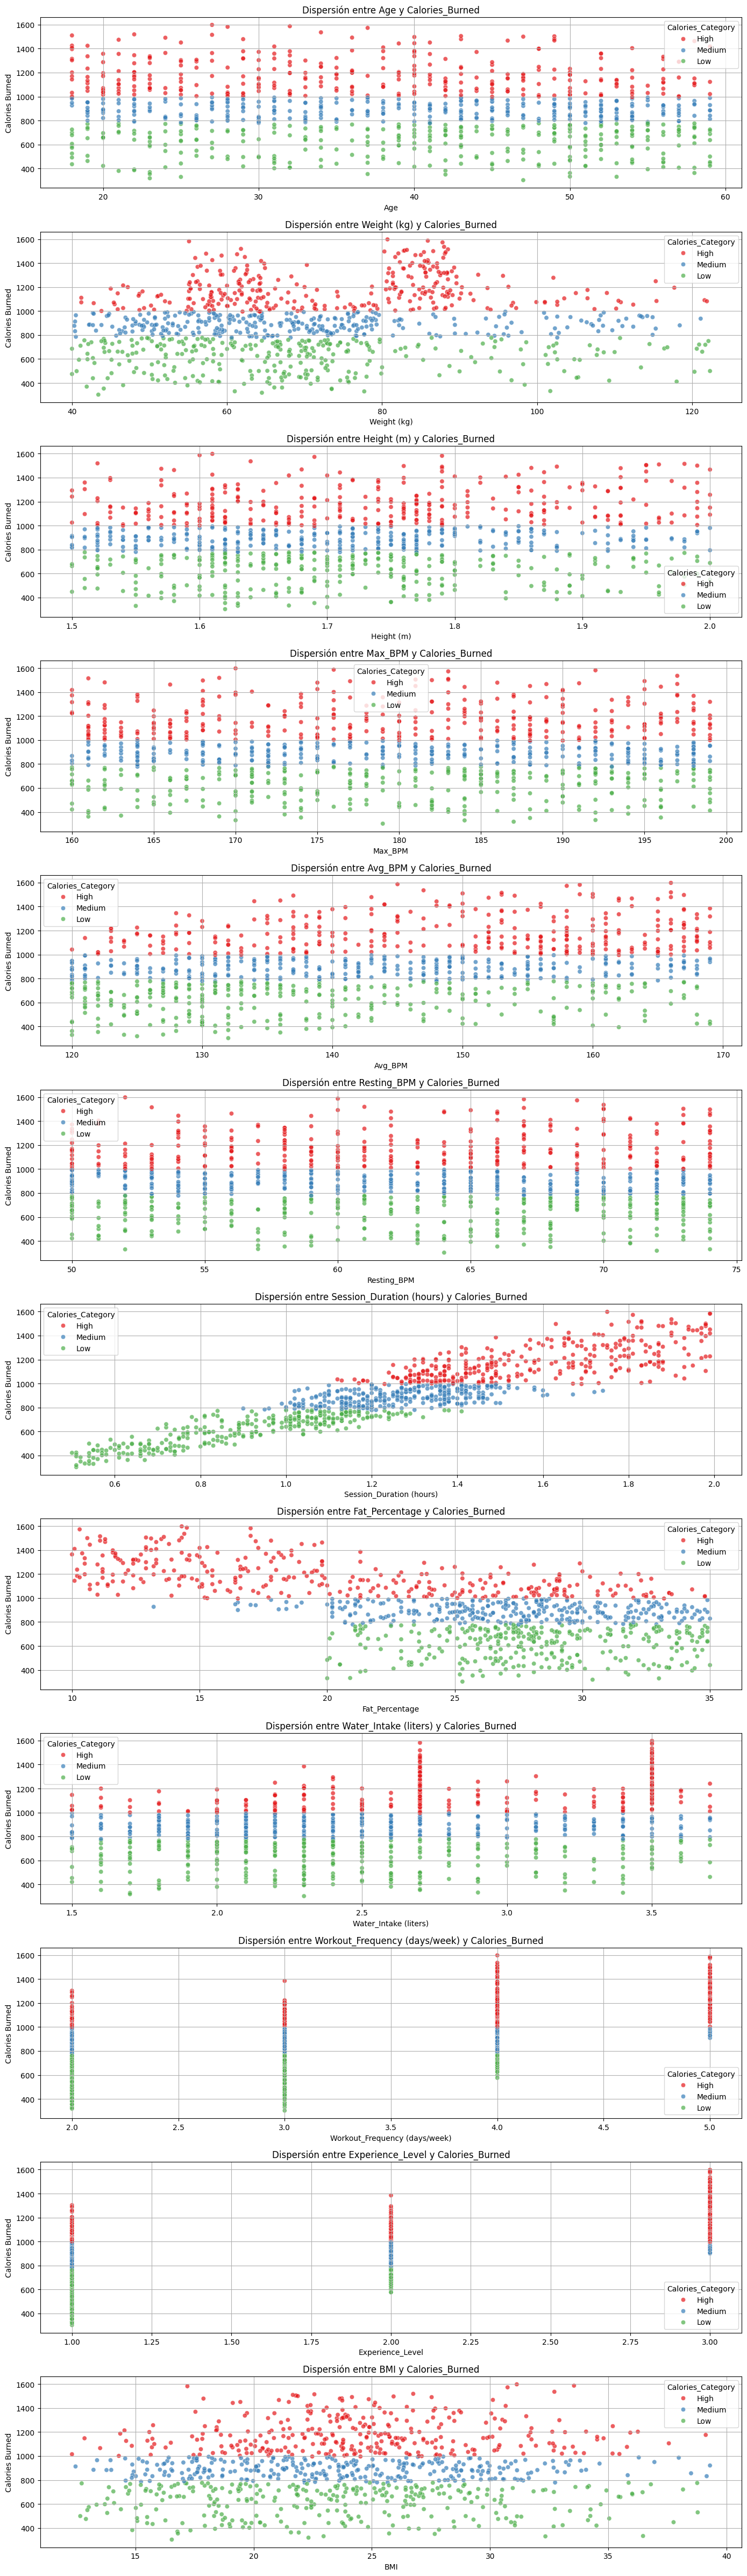

In [86]:
# Seleccionar todas las características numéricas excepto 'Calories_Burned'
features = data.select_dtypes(include=['float64', 'int64']).drop(columns=['Calories_Burned']).columns

# Crear subplots para cada característica numérica
plt.figure(figsize=(14, len(features) * 4))
for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    sns.scatterplot(x=feature, y='Calories_Burned', hue='Calories_Category', data=data, palette='Set1', alpha=0.7)
    plt.title(f'Dispersión entre {feature} y Calories_Burned')
    plt.xlabel(feature)
    plt.ylabel('Calories Burned')
    plt.grid()
plt.tight_layout()
plt.show()
